# Part 1: Clustering
# 1. What is Clustering?

Clustering is an unsupervised learning technique used to group data points that share similar characteristics. Unlike supervised learning, where the data is labeled, in clustering, we don't know the categories in advance. The goal of clustering is to divide the data into groups or clusters, where data points within a cluster are similar to each other, and data points in different clusters are dissimilar.

# 2. Types of Clustering Algorithms
There are many clustering algorithms, but the two most common ones we'll cover here are:

## a. K-Means Clustering

K-means clustering tries to divide data into K clusters, where each cluster is represented by a centroid (the mean of all points in the cluster).

**How it works:**

1. Initialize K cluster centroids (often randomly).
2. Assign each data point to the nearest centroid.
3. Recalculate the centroids based on the points assigned to each cluster.
4. Repeat steps 2 and 3 until the centroids no longer move significantly (convergence).


**Pros:**

1. Easy to implement and works well with spherical or well-separated clusters.

**Cons:**

 1. You must pre-define the number of clusters, and the algorithm may converge to a local optimum.




## Step-by-Step K-Means Code:

Let's apply K-Means clustering to the Iris Dataset, which has 4 features (sepal length, sepal width, petal length, and petal width).

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [52]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # features
y = iris.target  # target labels (species)

In [53]:
# Apply KMeans Clustering (let's assume we want 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [54]:
# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


In [55]:
from sklearn.metrics import silhouette_score
predicted =kmeans.predict(X)
silhouette_score(X,predicted)

0.5528190123564095

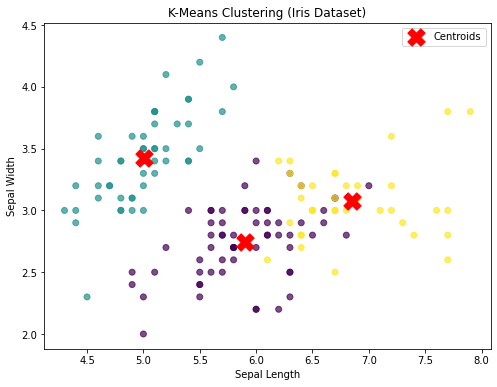

In [56]:
# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)  # First two features for visualization
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (Iris Dataset)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


**Explanation:**

>> The code applies K-Means clustering on the Iris dataset and tries to divide the data into 3 clusters (since there are 3 species in the Iris dataset).

>> The scatter plot shows the data points colored by their assigned clusters, and the red "X" markers represent the centroids of those clusters.

## b. Hierarchical Agglomerative Clustering (HAC)

Unlike K-Means, Hierarchical Agglomerative Clustering (HAC) doesn’t require you to specify the number of clusters beforehand. Instead, it starts with each data point as its own cluster and iteratively merges the closest clusters based on some similarity metric.

**How HAC Works:**

1. Start with each data point as its own cluster.
2. Find the two closest clusters and merge them.
3. Repeat step 2 until all data points are in a single cluster or the desired number of clusters is reached.

**Pros:**

You don't need to choose the number of clusters initially and it creates a dendrogram (tree-like diagram) that can help visualize the hierarchy of clusters.

**Cons:**

 It can be computationally expensive for large datasets.

## Step-by-Step Hierarchical Clustering Code:

In [57]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering (let's assume we want 3 clusters)
hierarchical = AgglomerativeClustering(n_clusters=3)
labels_hierarchical = hierarchical.fit_predict(X)


In [58]:

silhouette_score(X,labels_hierarchical)

0.5543236611296419

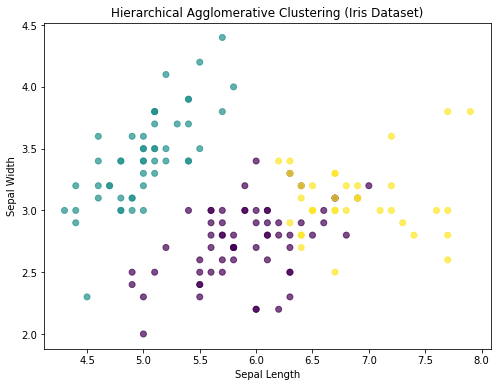

In [59]:

# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_hierarchical, cmap='viridis', alpha=0.7)  # First two features for visualization
plt.title('Hierarchical Agglomerative Clustering (Iris Dataset)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


**Explanation:**

>> The scatter plot shows the data points grouped into clusters, but note that no centroids are shown because this method doesn't explicitly calculate centroids like K-Means.

### Cluster Comparison:
##### K-Means:
> Works well for well-separated spherical clusters, but requires you to choose the number of clusters upfront.

##### Hierarchical Clustering:
> Doesn’t require specifying the number of clusters upfront, and instead builds a tree structure (dendrogram), which can be useful to visualize the relationships between clusters.

### Conclusion

Clustering is a powerful unsupervised learning technique that can help discover patterns and group similar data points. Techniques like K-Means and Hierarchical Clustering are commonly used for a variety of applications, including customer segmentation and anomaly detection. Dimensionality reduction techniques like PCA play an essential role in making clustering algorithms more effective, especially for high-dimensional data.



## c. Market Segmentation Using Clustering

Market segmentation involves grouping customers based on their characteristics to tailor marketing strategies. For instance, businesses may segment customers based on features such as income, spending habits, or demographic information.

### Code Example: Simulating Market Segmentation
Let's simulate customer data, apply K-Means, and analyze the segmentation.

In [60]:
# Simulating customer data: income and spending score
from sklearn.datasets import make_blobs

X_customer, _ = make_blobs(n_samples=500, centers=5, random_state=42)


In [61]:
# Apply K-Means for market segmentation
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_customer)


c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [62]:
m_predict = kmeans.predict(X_customer)
silhouette_score(X_customer,m_predict)

0.7328381899726921

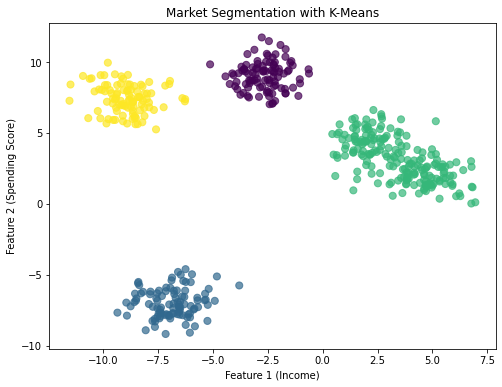

In [63]:
# Visualize the market segmentation
plt.figure(figsize=(8, 6))
plt.scatter(X_customer[:, 0], X_customer[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.title('Market Segmentation with K-Means')
plt.xlabel('Feature 1 (Income)')
plt.ylabel('Feature 2 (Spending Score)')
plt.show()

**Analysis**

The scatter plot shows how customers are grouped based on their income and spending scores. The clusters indicate different customer segments that can be targeted with personalized marketing strategies

## d. Semi-Supervised Learning and Look-Alike Models

### Combining Supervised and Unsupervised Learning

In real-world applications, it's often advantageous to combine supervised and unsupervised learning techniques. By doing so, we can enhance the performance of our models and work more effectively with both labeled and unlabeled data.

#### Use Case 1: Look-Alike Models

A **look-alike model** is a powerful tool used to find new, potential customers or market segments that resemble the most valuable ones. Here's how it works:

- First, **clustering** techniques like K-Means or Hierarchical Agglomerative Clustering are used to segment customers into distinct groups based on their similarities.
- Then, a **look-alike model** identifies customers who resemble your most valuable ones. The idea is that if a new customer shares many characteristics with existing valuable customers, they are likely to also be valuable.

In practice, look-alike models are often used in **prospecting**, where businesses identify new customers or markets with high potential by analyzing the similarity to those already known to be valuable.

#### Use Case 2: Semi-Supervised Learning

**Semi-supervised learning** is a technique where we combine small amounts of labeled data with large amounts of unlabeled data to improve model training. It is especially useful when labeling data is expensive or time-consuming. The basic steps include:

1. **Training the model** on a small set of labeled data.
2. **Generating pseudo-labels** for the unlabeled data by using the trained model.
3. **Combining labeled and pseudo-labeled data** to form a larger dataset.
4. **Retraining the model** on the combined dataset to improve its performance.

This approach is particularly useful when we have a large dataset but only a small portion of it is labeled. By using **pseudo-labels** (predictions made by the model), we can leverage unlabeled data to improve the overall performance of the model.

### Benefits and Challenges of Semi-Supervised Learning

#### Benefits:
- **Increased Data Access**: By using pseudo-labels, we can effectively use large amounts of unlabeled data, which is often more accessible than labeled data.
- **Cost-Efficiency**: Labeling data can be expensive, so generating pseudo-labels allows us to bypass some of these costs.

#### Challenges:
- **Noise in Pseudo-Labels**: If the model is not accurate enough, pseudo-labels might introduce noise, potentially making the model worse.
- **Feedback Loops**: Incorrect pseudo-labels can reinforce mistakes, leading to a feedback loop of errors. To mitigate this, it's crucial to use a **holdout set** (a test set of ground-truth labeled data) to evaluate the model's performance and ensure the pseudo-labels are improving the model.



# Part 2: PCA (Principal Component Analysis)

## 1. What is PCA?

PCA is a technique used to **reduce the dimensionality of data** while preserving as much of its **variability** as possible. The primary goal of PCA is to reduce the number of features in your dataset (dimensionality), while maintaining the essential patterns in the data. This is useful when you have many features, and it becomes computationally expensive or inefficient to process the data with all of them.

## 2. Why Use PCA?

Imagine you have a dataset with many features (e.g., hundreds of columns). Some of these features might be related to each other (i.e., correlated), so PCA can help by **combining** these features into fewer, **uncorrelated components**. By using fewer components, you simplify the data without losing much information, which can help improve model performance.

## 3. Key Concepts in PCA

### Covariance

The **covariance matrix** is a key concept in PCA. Covariance measures how two features (variables) vary together. If two variables have high covariance, it means that when one variable increases, the other one tends to increase as well.

- **Positive covariance**: As one variable increases, the other increases.
- **Negative covariance**: As one variable increases, the other decreases.
- **Zero covariance**: The variables are independent (no relationship).

The covariance matrix captures the relationships between all pairs of features in your dataset. PCA works by identifying directions (or combinations of features) where the data varies the most.

### Eigenvalues and Eigenvectors

In PCA, we use **eigenvalues** and **eigenvectors** to understand how the data is spread across different directions.

- **Eigenvectors**: These represent the directions in which the data varies the most. In other words, eigenvectors are the "axes" along which the data points are spread.
- **Eigenvalues**: These indicate the magnitude or strength of variance along each eigenvector. A higher eigenvalue means more variance is captured along that eigenvector, meaning the component is more important.

#### How Eigenvalues and Eigenvectors are Used in PCA:

- **Step 1: Covariance Matrix**: First, calculate the covariance matrix to understand how the features in the dataset are related.
- **Step 2: Eigenvalues and Eigenvectors**: The covariance matrix is then used to calculate the eigenvalues and eigenvectors.
- **Step 3: Sorting**: Sort the eigenvalues in decreasing order and select the top eigenvectors corresponding to the largest eigenvalues. These eigenvectors form the new "principal components" of the data.
- **Step 4: Project Data**: Project the original data onto the new space formed by the selected eigenvectors.

## 4. Why Does PCA Work?

By projecting the data along the directions with the highest variance (the eigenvectors), PCA captures the most important patterns in the data while reducing dimensionality. By keeping only the principal components with the highest eigenvalues, we retain the most significant information.


Part 2: Step-by-Step Implementation of PCA












### Implementing PCA

Let's now walk through how PCA works, step-by-step, using Python. We'll start by working with the Iris dataset for simplicity.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)


**Step 1: Standardizing the Data**

Since PCA is affected by the scale of the data, we first need to standardize it. Standardization transforms the data so that each feature has a mean of 0 and a standard deviation of 1.

In [65]:

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Step 2: Computing the Covariance Matrix**

Once the data is standardized, we compute the covariance matrix, which tells us how the features are related to one another.

In [66]:

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(X_scaled.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

**Step 3: Eigenvalues and Eigenvectors**

Next, we calculate the eigenvalues and eigenvectors of the covariance matrix. These will help us understand which directions in the data capture the most variance.

In [67]:

# Step 3: Compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print('*'*20)
print((eigenvectors))


[2.93808505 0.9201649  0.14774182 0.02085386]
********************
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


**Step 4: Sorting and Selecting Principal Components**

We sort the eigenvectors by the eigenvalues and choose the top components (those with the highest eigenvalues) to represent the data.

In [68]:

# Step 4: Sort eigenvectors by eigenvalues (largest to smallest)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]


**Step 5: Projecting the Data onto New Axes**
Finally, we transform (or project) the original data onto the new axes (principal components), reducing the number of features in the process.

In [69]:

# Step 5: Choose the top 2 eigenvectors (for 2D visualization)
top_eigenvectors = eigenvectors_sorted[:, :2]

# Step 6: Project the data onto the new 2D space
X_pca = X_scaled.dot(top_eigenvectors)


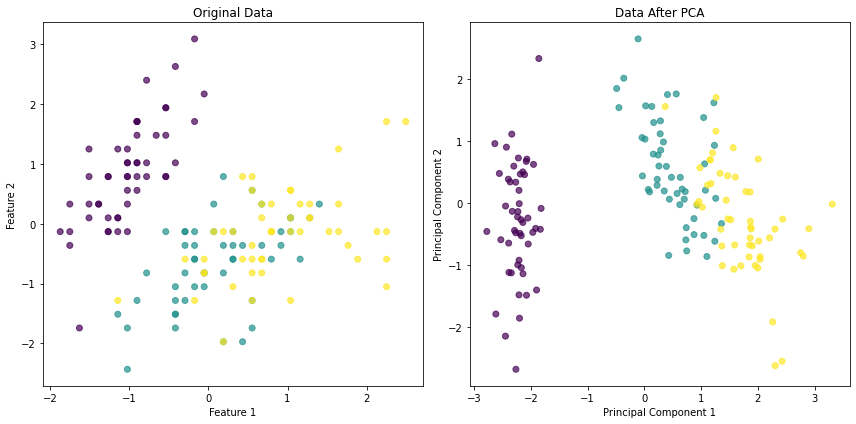

Eigenvalues (explained variance): [2.93808505 0.9201649 ]
Total variance explained by the top 2 components: 0.9581320720000164


In [70]:

# Visualize the data before and after PCA
plt.figure(figsize=(12, 6))

# Original data (before PCA)
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Transformed data (after PCA)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Output the explained variance
print("Eigenvalues (explained variance):", eigenvalues_sorted[:2])
print("Total variance explained by the top 2 components:", np.sum(eigenvalues_sorted[:2]) / np.sum(eigenvalues_sorted))


### K-Means Clustering with PCA

Now that we have a good understanding of how PCA works and how to reduce dimensionality, we can move on to K-Means Clustering. As a refresher, PCA will help us visualize and work with lower-dimensional representations of the data, which is especially useful when we have many features.

c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gmwende\anaconda3\envs\learn-env\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


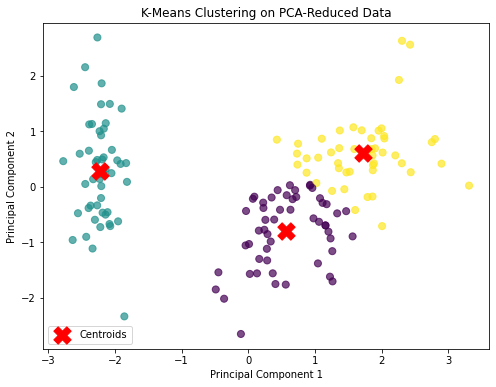

In [73]:
# Apply PCA to reduce the data to 2 components for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the K-Means clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**Clusters:** The scatter plot shows how the data is grouped into clusters after applying K-Means on the PCA-reduced data. The clusters are clearly visible, and the red 'X' markers represent the centroids of each cluster.

**Dimensionality Reduction:** PCA has reduced the data to just 2 dimensions, making it easier to visualize and interpret the clustering result.


### Conclusion
PCA is a powerful tool for dimensionality reduction, helping us to extract the most important features in a dataset and make complex clustering tasks more manageable. By reducing dimensions, we can improve the performance of clustering algorithms like K-Means, and gain better insights into the structure of the data.